Up to now, all of our work has been in one spatial dimension (Steps 1 to 4). We can learn a lot in just 1D, but let's grow up to flatland: two dimensions.

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction at constant $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

\begin{align*}
x_i &= x_0 + i \mathop\Delta\!x\\
y_i &= y_0 + i \mathop\Delta\!y
\end{align*}

Now, define $u_{i,j} = u(x_i,\,y_j)$ and apply the finite-difference formulas on either variable $x$, $y$ acting separately on the $i$ and $j$ indices.
All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$
\left.\frac{\partial u}{\partial x}\right|_i = \frac{u_{i+1,j} - u_{i,j}}{\mathop\Delta\!x} + \mathcal{O}(\mathop\Delta\!x)
$$

and similarly in the $y$ direction.
Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12.
Let's get started!

# Step 5: 2-D Linear Convection

The PDE governing 2-D Linear Convection is written as

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0
$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u^n_i − u^n_{i−1}$).
Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.

With that in mind, our discretization of the PDE should be relatively straightforward.

$$
\frac{u^{n+1}_{i,j} − u^n_{i,j}}{\mathop\Delta\!t} + c \frac{u^n_{i,j} − u^n_{i−1,j}}{\mathop\Delta\!x} + c \frac{u^n_{i,j} − u^n_{i,j−1}}{\mathop\Delta\!y} = 0
$$

As before, solve for the only unknown:

$$
u^{n+1}_{i,j} = u^n_{i,j} − \frac{c \mathop\Delta\!t}{\mathop\Delta\!x} \left(u^n_{i,j} − u^n_{i−1,j}\right) − \frac{c \mathop\Delta\!t}{\mathop\Delta\!y} \left(u^n_{i,j} − u^n_{i,j−1}\right)
$$

We will solve this equation with the following initial conditions:

$$
u(x,\,y) =
\begin{cases}
 2.0 \text{ for } &0.5 \le x,\,y \le 1\\
 1.0 \text{ for } &\text{everywhere else}
\end{cases}
$$

and boundary conditions:

$$
u = 1 \text{ for }
\begin{cases}
x = 0,\,2.0 \\
y = 0,\,2.0
\end{cases}
$$


In [1]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

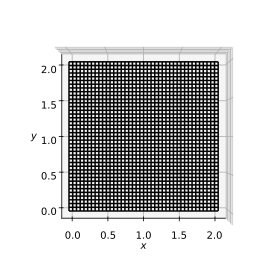

In [8]:
# Solution parameters
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

# Values for x and y domain
x_domain_interval = (0.0, 2.0)
y_domain_interval = (0.0, 2.0)
x = np.linspace(*x_domain_interval, nx)
y = np.linspace(*y_domain_interval, ny)


# Visualize the mesh
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.view_init(elev=90, azim=-90)

ax.zaxis.set_label_position("none")
ax.zaxis.set_ticks_position("none")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.zaxis.grid(False)
plt.grid(False)

# plt.axis('off')

surf = ax.plot_wireframe(X, Y, Z, color="black")

In [9]:
u = np.ones((ny, nx))

# Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2.0, otherwise 1.0
u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2.0

u0 = u.copy()

In [10]:
def plotter(elev=20, azim=45):
    """
    elev: elevation angle (in the z plane) in degrees
    azim: azimuth angle (in the (x,y) plane) in degrees
    """
    # Create a fig with a 3d axes

    # fig = plt.figure(figsize=(11, 7), dpi=100)
    # Add a 3d axes to the plot
    # ax = fig.add_subplot(projection='3d')

    # Alternative method
    # https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Create a coordinate system that is suitable for use with plot_surface
    X, Y = np.meshgrid(x, y)

    # Plot the surface
    surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize z-axis ticks
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter("{x:.02f}")

    # Setting labels and titles
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_zlabel(r"$u$")
    ax.set_title(r"$u_0 = u(x,\,y,\, t\!=\!0)$")

    # Add colorbar
    fig.colorbar(surf, shrink=0.5, aspect=20, label=r"$u_0$")

    # Initial view angles
    ax.view_init(elev=elev, azim=azim)

    plt.show()


from ipywidgets import interactive

iplot = interactive(plotter, elev=(-90, 90, 5), azim=(-90, 90, 5))
iplot

interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=5), IntSlider(value=45, de…

## Iterating in two dimensions

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the $i$'s and $j$'s.
Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.
First try evaluating the 2D convection code and see what results it produces.


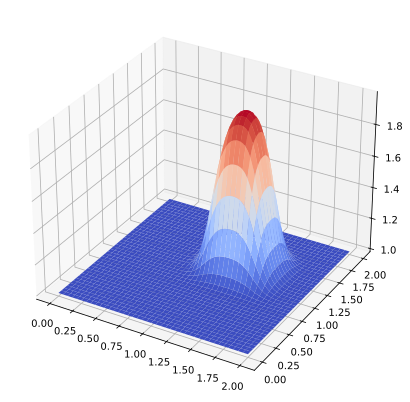

In [11]:
u = np.ones((ny, nx))
u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2

for _ in range(nt + 1):
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (
                un[j, i]
                - (c * dt / dx * (un[j, i] - un[j, i - 1]))
                - (c * dt / dy * (un[j, i] - un[j - 1, i]))
            )
            u[0, :] = 1.0
            u[-1, :] = 1.0
            u[:, 0] = 1.0
            u[:, -1] = 1.0

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection="3d")
surf2 = ax.plot_surface(X, Y, u, cmap=cm.coolwarm)

## Array (Vectorized) Operations

Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.

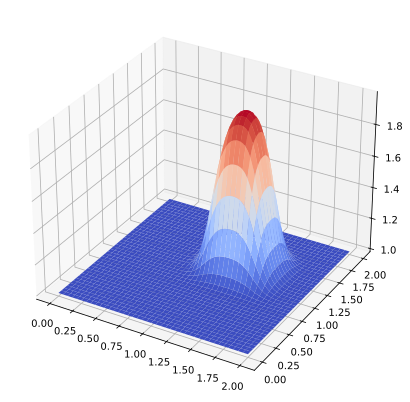

In [12]:
u = np.ones((ny, nx))
u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2
u0 = u.copy()

solutions = [u0]

for _ in range(nt + 1):
    un = u.copy()
    u[1:, 1:] = (
        un[1:, 1:]
        - (c * dt / dx * (un[1:, 1:] - un[1:, :-1]))
        - (c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    )
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    solutions.append(u.copy())

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection="3d")
surf2 = ax.plot_surface(X, Y, u, cmap=cm.coolwarm)

## Animation

In [13]:
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "html5"

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.close()


def update_anim(frame):
    # https://matplotlib.org/stable/gallery/mplot3d/wire3d_animation_sgskip.html
    ax.cla()
    ax.plot_surface(X, Y, solutions[frame], cmap=cm.coolwarm)
    ax.set_zlim([1.0, 2.05])
    return (fig,)


ani = anim.FuncAnimation(
    fig, func=update_anim, frames=len(solutions), interval=35, blit=True
)
ani